In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from const import METHODS

In [2]:
base_path = "./parsed/"

In [3]:
def combine_data():
    data = pd.DataFrame()
    for method in METHODS:
        if METHODS[method]["path"]:
            df = pd.read_csv(base_path + method + ".csv")
            data = pd.concat([data, df])
    return data
    

In [4]:
combined_data = combine_data()

In [5]:
attributes = ['title', 'brand', 'manufacturer', 'description', 'images', 'price', 'stars', 'ratings_quantity']

def calculate_metrics(df):
    df_filtered = df[attributes]
    n = df_filtered.shape[0] 
    m = df_filtered.shape[1] 

    completeness_rate = df_filtered.sum().sum() / (n * m) * 100
    missing_attribute_rate = 100 - completeness_rate
    full_product_completion = (df_filtered.sum(axis=1) == m).mean() * 100
    product_data_failure = (df_filtered.sum(axis=1) == 0).mean() * 100
    product_data_availability = (df_filtered.sum(axis=1) > 0).mean() * 100
    partial_product_completion = ((df_filtered.sum(axis=1) > 0) & (df_filtered.sum(axis=1) < m)).mean() * 100

    return {
        'Completeness Rate': completeness_rate,
        'Missing Attribute Rate': missing_attribute_rate,
        'Full Product Completion Rate': full_product_completion,
        'Product Data Failure Rate': product_data_failure,
        'Product Data Availability Rate': product_data_availability,
        'Partial Product Completion Rate': partial_product_completion
    }



In [22]:
metrics_by_method = combined_data.groupby(["method", "category"]).apply(calculate_metrics)
metrics_df = metrics_by_method.unstack(level=0)
metrics_df = pd.DataFrame(metrics_df.to_records())

metrics_melted = metrics_df.melt(id_vars=['category'], 
                         value_vars=['RAINFOREST', 'SELENIUM_BARE', 'SELENIUM_CAPTCHA',
                                      'SELENIUM_CAPTCHA_ROTATE_USER_AGENT',
                                      'SELENIUM_CAPTCHA_ROTATE_USER_AGENT_PROXY', 
                                      'SPAPI', 'STATIC_BARE', 'STATIC_ROTATE_USER_AGENT', 
                                      'STATIC_ROTATE_USER_AGENT_RETRIES'],
                         var_name='method', 
                         value_name='value')

print(metrics_melted.head())

                   category      method  \
0  beauty_and_personal_care  RAINFOREST   
1    clothing_shoes_jewelry  RAINFOREST   
2      health_and_household  RAINFOREST   
3          home_and_kitchen  RAINFOREST   
4            toys_and_games  RAINFOREST   

                                               value  
0  {'Completeness Rate': 97.5, 'Missing Attribute...  
1  {'Completeness Rate': 93.875, 'Missing Attribu...  
2  {'Completeness Rate': 98.625, 'Missing Attribu...  
3  {'Completeness Rate': 97.25, 'Missing Attribut...  
4  {'Completeness Rate': 92.375, 'Missing Attribu...  


/var/folders/r4/jx9mrl69663d5mws4ghflznm0000gn/T/ipykernel_64249/1945073563.py:3: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  metrics_by_method = combined_data.groupby(["method", "category"]).apply(calculate_metrics)


In [27]:
metrics_by_method_category = combined_data.groupby(['method', 'category']).apply(calculate_metrics)
metrics_df = pd.DataFrame(metrics_by_method_category.tolist(), index=metrics_by_method_category.index)
metrics_df.reset_index(inplace=True)
print(metrics_df)

                                      method                  category  \
0                                 RAINFOREST  beauty_and_personal_care   
1                                 RAINFOREST    clothing_shoes_jewelry   
2                                 RAINFOREST      health_and_household   
3                                 RAINFOREST          home_and_kitchen   
4                                 RAINFOREST            toys_and_games   
5                              SELENIUM_BARE  beauty_and_personal_care   
6                              SELENIUM_BARE    clothing_shoes_jewelry   
7                              SELENIUM_BARE      health_and_household   
8                              SELENIUM_BARE          home_and_kitchen   
9                              SELENIUM_BARE            toys_and_games   
10                          SELENIUM_CAPTCHA  beauty_and_personal_care   
11                          SELENIUM_CAPTCHA    clothing_shoes_jewelry   
12                          SELENIUM_C

/var/folders/r4/jx9mrl69663d5mws4ghflznm0000gn/T/ipykernel_64249/3502164429.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  metrics_by_method_category = combined_data.groupby(['method', 'category']).apply(calculate_metrics)


       method                  category  Completeness Rate  \
0  RAINFOREST  beauty_and_personal_care             97.500   
1  RAINFOREST    clothing_shoes_jewelry             93.875   
2  RAINFOREST      health_and_household             98.625   
3  RAINFOREST          home_and_kitchen             97.250   
4  RAINFOREST            toys_and_games             92.375   

   Missing Attribute Rate  Full Product Completion Rate  \
0                   2.500                          82.0   
1                   6.125                          52.0   
2                   1.375                          96.0   
3                   2.750                          81.0   
4                   7.625                          56.0   

   Product Data Failure Rate  Product Data Availability Rate  \
0                        0.0                           100.0   
1                        0.0                           100.0   
2                        1.0                            99.0   
3               

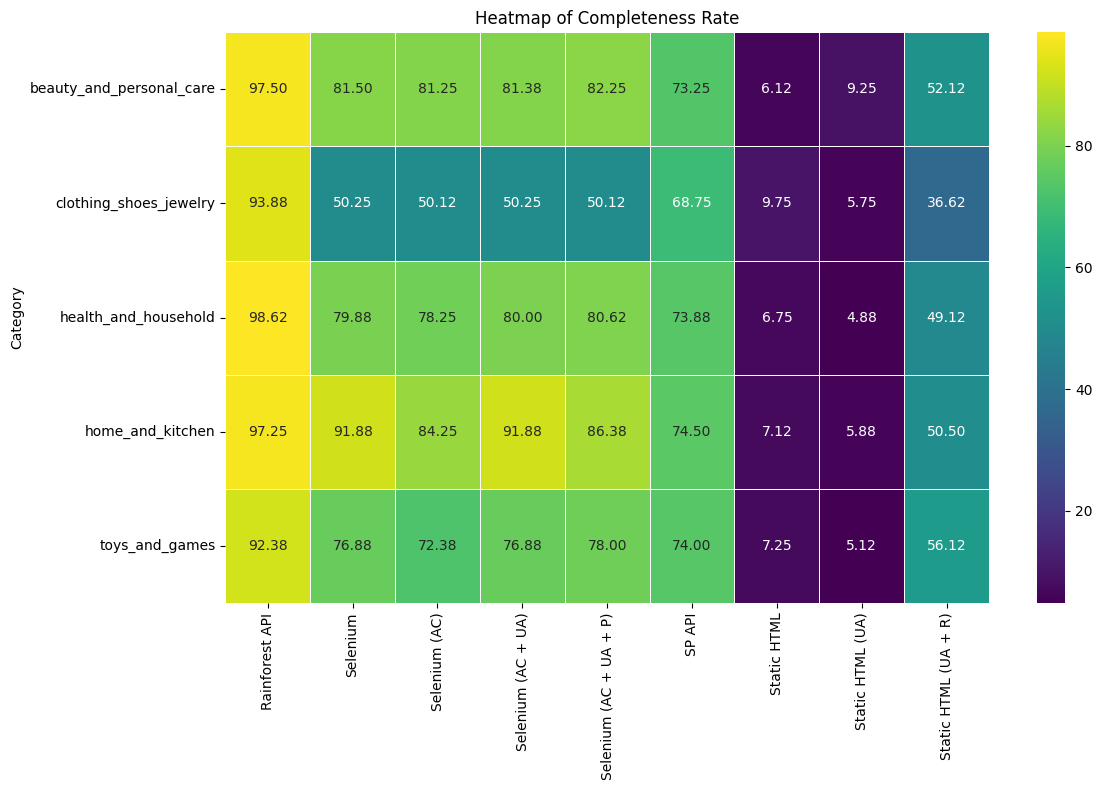

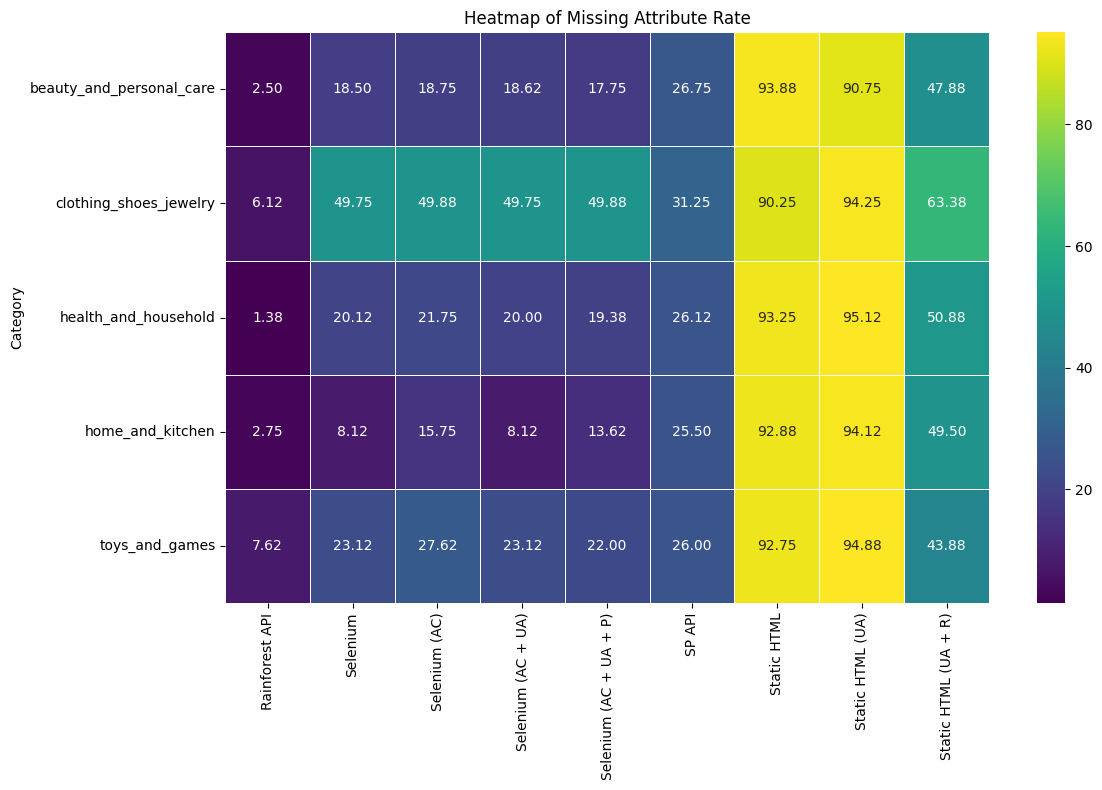

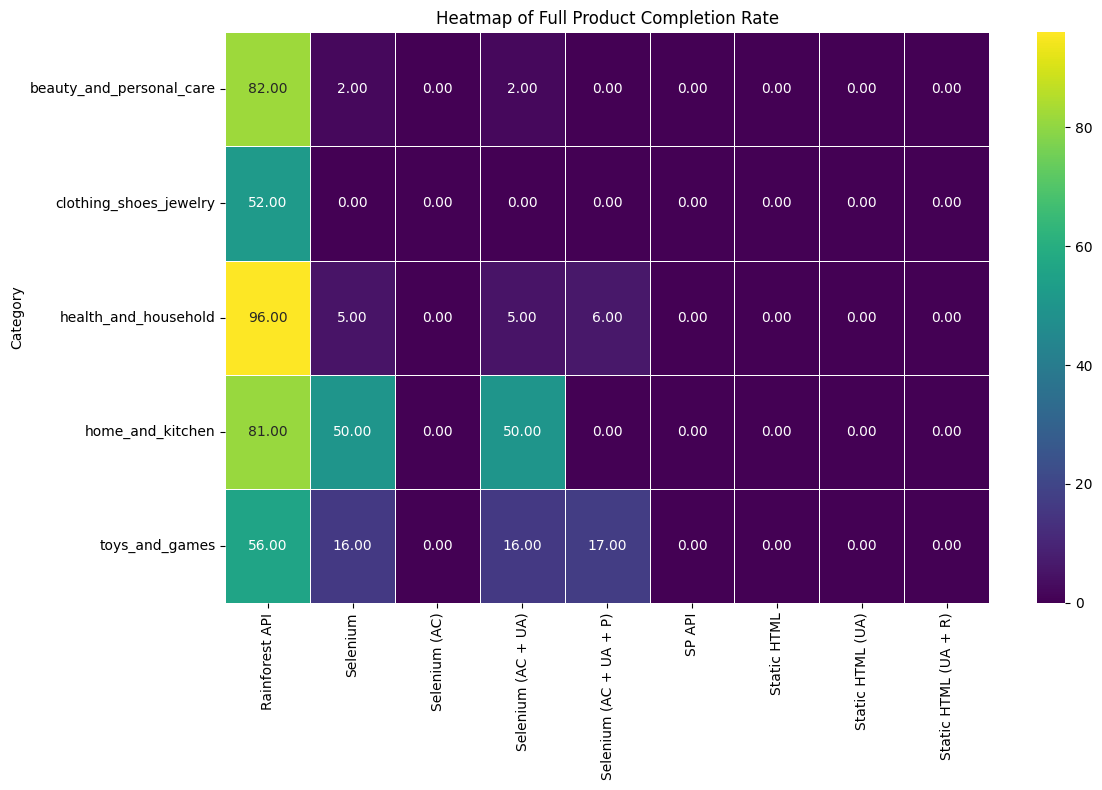

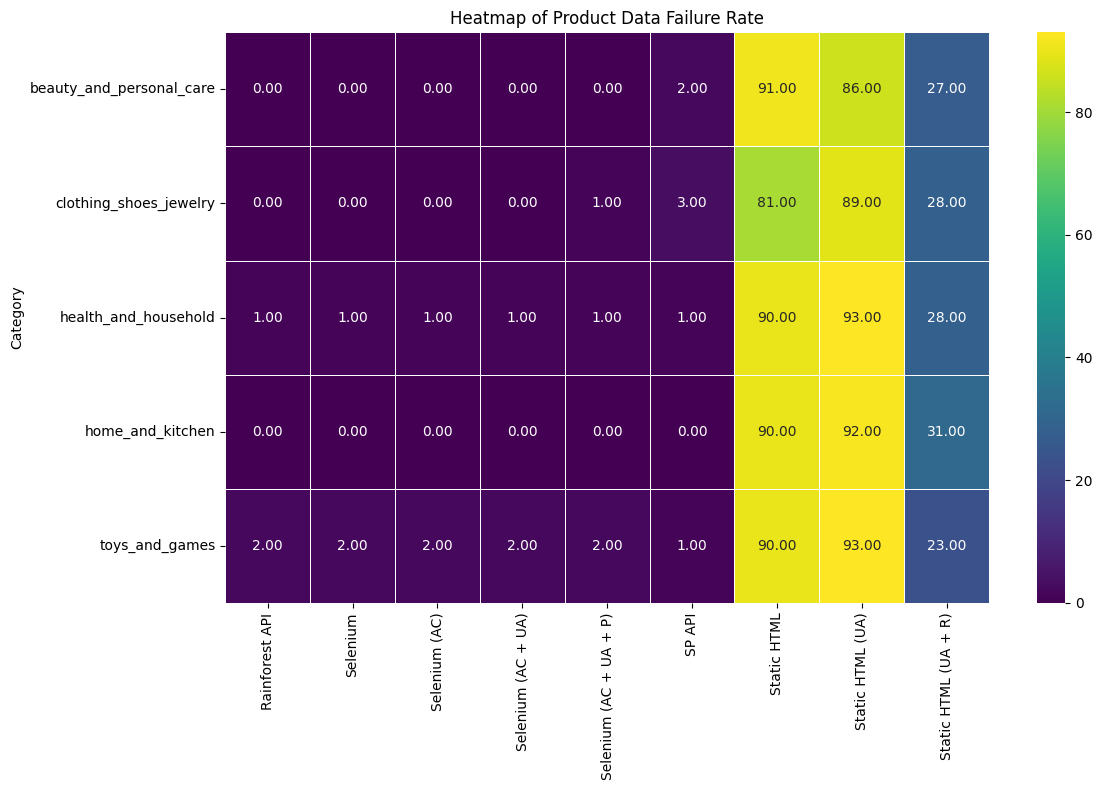

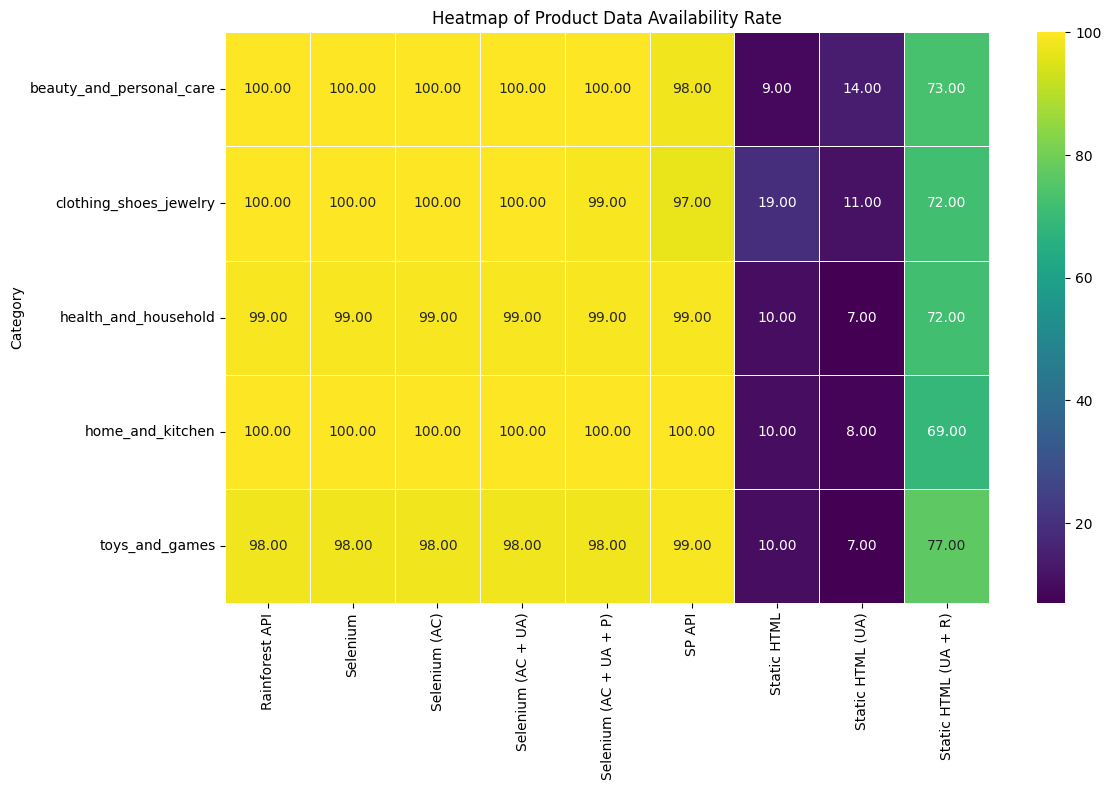

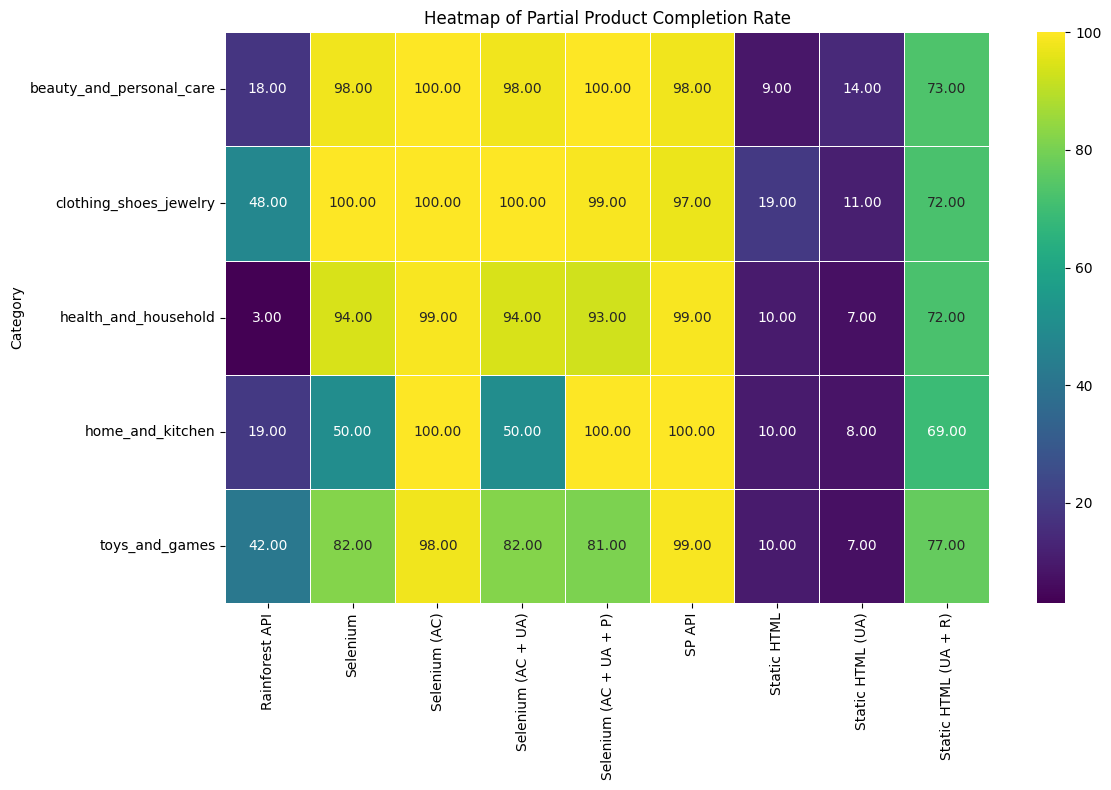

In [48]:
metrics_pivoted = metrics_df.pivot(index='category', columns='method', values=['Completeness Rate', 
                                                                             'Missing Attribute Rate', 
                                                                             'Full Product Completion Rate', 
                                                                             'Product Data Failure Rate', 
                                                                             'Product Data Availability Rate', 
                                                                             'Partial Product Completion Rate'])

metrics = ['Completeness Rate', 
           'Missing Attribute Rate', 
           'Full Product Completion Rate', 
           'Product Data Failure Rate', 
           'Product Data Availability Rate', 
           'Partial Product Completion Rate']

for metric in metrics:
    method_to_tick = {method: data["tick"] for method, data in METHODS.items()}

    plt.figure(figsize=(12, 8))
    sns.heatmap(metrics_pivoted[metric], annot=True, cmap="viridis", fmt=".2f", linewidths=0.5)
    plt.title(f'Heatmap of {metric}')
    custom_labels = list(map(lambda x: METHODS[x]["tick"] if METHODS[x]["path"] else None, list(metrics_df["method"].unique())))
    custom_labels = list(filter(lambda x: x is not None, custom_labels))
    plt.xticks(ticks=np.arange(0.5, len(custom_labels) + 0.5, 1), labels=custom_labels, rotation=90)
    plt.ylabel('Category')
    plt.xlabel('')
    plt.tight_layout()
    plt.show()
